# Comparing Images MSE and Structual Similarity

In [ ]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip


### Mean Squared Erro (MSE)
The MSE between two images is the sum of squared difference between two images. The lower the MSE the more similar the images are.

In [7]:
def mse(image1, image2):
  # images must be of the same dimension
  error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
  error /= float(image1.shape[0] * image1.shape[1])
  return error

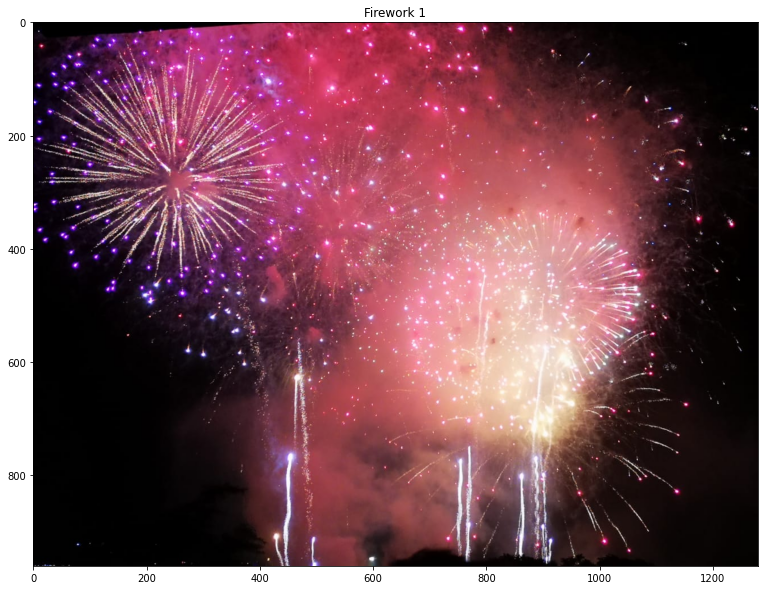

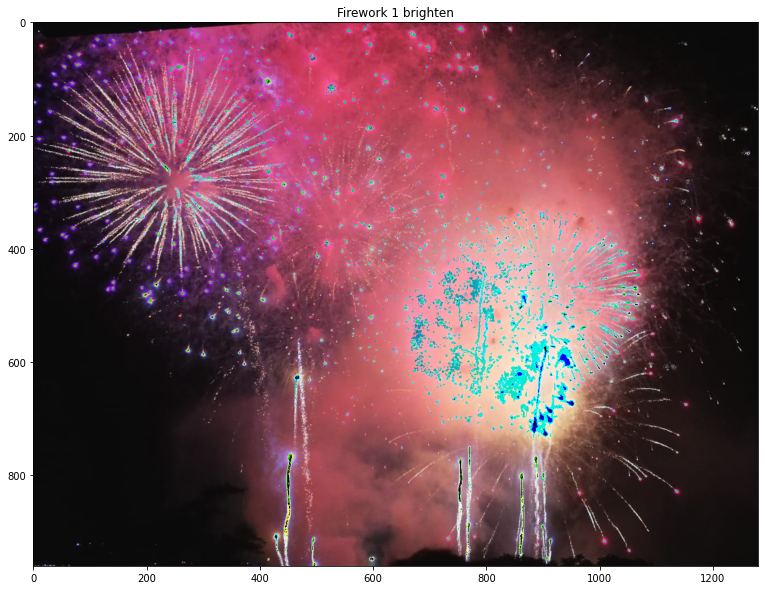

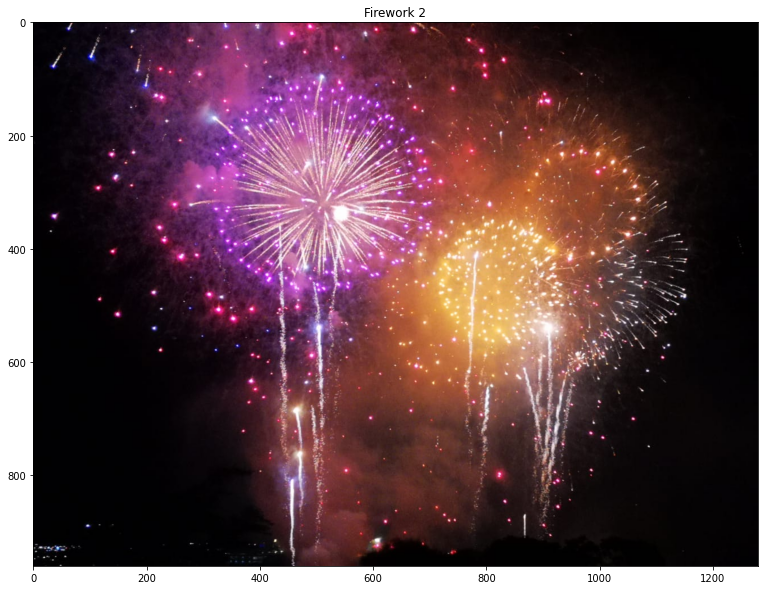

In [6]:
firework1 = cv2.imread("/content/images/fireworks.jpeg")
firework2 = cv2.imread("/content/images/fireworks2.jpeg")

# brighten the firework 1
M = np.ones(firework1.shape, dtype="uint8") * 10
firework1b = np.add(firework1, M)

imshow("Firework 1", firework1)
imshow("Firework 1 brighten", firework1b)
imshow("Firework 2", firework2)

In [8]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print("MSE = {:.2F}".format(mse(image1, image2)))
  print("SS = {:.2F}".format(structural_similarity(image1, image2)))

In [9]:
compare(firework1, firework1)

MSE = 0.00
SS = 1.00


In [10]:
compare(firework1, firework1b)

MSE = 329.28
SS = 0.74


In [11]:
compare(firework1, firework2)

MSE = 2125.41
SS = 0.48


In [12]:
compare(firework2, firework1b)

MSE = 2273.72
SS = 0.32
